# Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analysis Question

A survey was done across Kenya, Rwanda, Tanzania and Uganda and questions were asked to get an overview of their finanical behaviour. 

The research problem is to figure out, from the data gotten, how we can predict which individuals are most likely to have or use a bank account. The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success

This analysis will be considered successful upon predicting which factors from the given variables can lead to an increase in likelihood of an individual having or using a bank account.

### c) Understanding the context 

Financial inclusion is still an obstacle to development in Africa. For instance only 13.9% of the adult population in Kenya, Uganda, Rwanda and Tanzania have access to or use a commerical bank account.

Despite an increase in mobile money platforms, access to bank accounts helps businesses build their credit worthiness and improve access to other financial services. Furthermore, families are able to save and facilitate payments.

The analysis question, once answered, will be important in shaping the decisions financial stakeholders in the 4 countries will make with regards to their (potential)clients.

### d) Recording the Experimental Design

For this experimental design, I'll be investigating the relationship between variables using the Principal Component Analysis.

PCA converts high dimensional data to low dimensional data by selecting the most important features. These features are selected on the basis of variance in output.

The feature with the highest variance will be Prinicipal Component 1(PC1), the feature with the 2nd highest variance will be PC2, and so on. The PCs should have zero correlation with each other.



### e) Data Relevance

The data provided is applicable to the research question as it provides information that will be useful to us when doing the analysis.

## 2. Loading the Data

In [0]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load the datasets

# The survey dataset
finance = pd.read_csv("http://bit.ly/FinancialDataset")


In [0]:
# The definitions of the variables

definitions = pd.read_csv("http://bit.ly/VariableDefinitions")


## 3. Exploring the Data

In [0]:
# View the definitions dataset
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [0]:
# Preview the top of the finance dataset
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Preview the bottom of the finance dataset
finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
# Check information about the dataset
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
# Check basic statistical data
finance.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [0]:
# Check the datatypes of the variables in the dataset
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [0]:
# Check the number of entries in the dataset
finance.shape

(23524, 13)

In [0]:
# Check the number of unique entries in each column
finance.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

## 4. Cleaning the Dataset

In [0]:
# Check for missing data across the different columns

finance.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
# Drop all the rows having missing values
finance.dropna(axis = 0, inplace=True)

In [0]:
# Check if there are still any missing values
finance.isnull().any()

country                   False
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent Age            False
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [0]:
# Check for duplicated values

finance.duplicated().any()

# There are no duplicated values

False

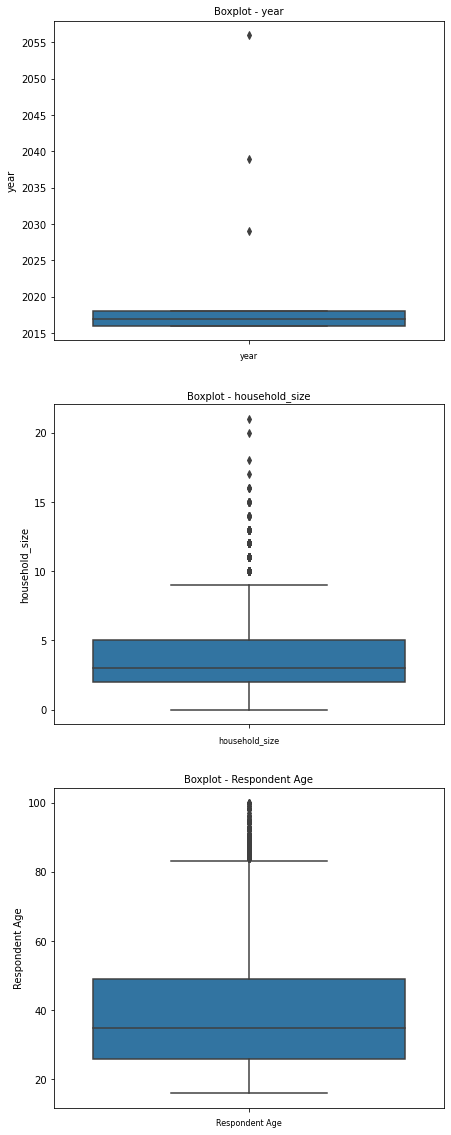

In [0]:
# Check for outliers

column_names = ['year', 'household_size', 'Respondent Age']
fig, ax = plt.subplots(len(column_names), figsize=(7,20))

for i, col_val in enumerate(column_names):
  sns.boxplot(y = finance[col_val], ax=ax[i])
  ax[i].set_title('Boxplot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [0]:
# Check outliers using IQR Score

# Find the IQR Score first

Q1 = finance.quantile(0.25)
Q3 = finance.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


In [0]:
# Multiply the (IQR) by 1.5
# Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
# Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

print(finance < (Q1 - 1.5 * IQR)) |(finance > (Q3 + 1.5 * IQR))

# True indicates the prescence of an outlier

       Cell Phone Access  Has a Bank account  ...  uniqueid   year
0                  False               False  ...     False  False
1                  False               False  ...     False  False
2                  False               False  ...     False  False
3                  False               False  ...     False  False
4                  False               False  ...     False  False
...                  ...                 ...  ...       ...    ...
23519              False               False  ...     False  False
23520              False               False  ...     False  False
23521              False               False  ...     False  False
23522              False               False  ...     False  False
23523              False               False  ...     False  False

[23343 rows x 13 columns]


TypeError: ignored

In [0]:
# Remove the outliers

finance_outliers = finance[~((finance < (Q1 - 1.5 * IQR)) |(finance > (Q3 + 1.5 * IQR))).any(axis=1)]
finance_outliers.shape

(22725, 13)

In [0]:
# Export the cleaned dataset

finance_outliers.to_csv('finance_clean.csv')

In [0]:
finance_clean = pd.read_csv('finance_clean.csv')
finance_clean.head()

,Unnamed: 0,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 5. Exploratory Analysis

### a) Univariate Analysis

Univariate analysis describes an individual variable. Its aim is to describe the data and find patterns within it. 

Our dataset conists of continous and categorical variables.

For the continuous variables, we'll use measures of central tendency and dispersion. These variables will be visualized using histograms and boxplots.


For the categorical variables, we'll use frequency tables and bar charts.

#### i) Measures of Central Tendency

##### Mean

In [0]:
# Find the mean of the numerical variables
# The mean here estimates the value of the whole column

finance_clean["year"].mean()

2016.9681848184819

In [0]:
finance_clean["household_size"].mean()

3.57984598459846

In [0]:
finance_clean["Respondent Age"].mean()

38.34798679867987

##### Mode

In [0]:
# Find the mode of the numerical variables
# The mode is the value that appears most frequently

finance_clean["year"].mode()

0    2016
dtype: int64

In [0]:
finance_clean["household_size"].mode()

0    2.0
dtype: float64

In [0]:
finance_clean["Respondent Age"].mode()

0    30.0
dtype: float64

##### Median

In [0]:
# Find the median of the numerical variables
# The median is the value that appears in the middle and divides the data in 2 equal parts

finance_clean["year"].median()

2017.0

In [0]:
finance_clean["household_size"].median()

3.0

In [0]:
finance_clean["Respondent Age"].median()

35.0

#### ii) Measures of Dispersion

##### Standard Deviation

In [0]:
# Find the standard deviation
# This shows how far the data is spread out from the mean

finance_clean["year"].std()

# The std. deviation gotten is low meaning that the data points in this column are close to the mean

0.8463657883520268

In [0]:
finance_clean["household_size"].std()

# The std. deviation gotten is low meaning that the data points in this column are close to the mean

2.080542136724138

In [0]:
finance_clean["Respondent Age"].std()

# The std. deviation gotten is a bit big meaning that the data points in this column are spread out a bit
# farther from the mean over a wider range of values

15.806141256107674

##### Variance

In [0]:
# Find the variance
# This is a square of the standard deviation

finance_clean["year"].var()

# The variance here is very low meaning the data points are close to the mean

0.7163350476927479

In [0]:
finance_clean["household_size"].var()

# The variance here is low meaning the data points are close to the mean

4.328655582684643

In [0]:
finance_clean["Respondent Age"].var()

# The variance here is high meaning the data points are more scattered away from the mean

249.83410140802906

##### Range

In [0]:
# Find the range
# This is the difference between the highest and lowest value


# Finding the min and max values of the year
finance_year_max = finance_clean["year"].max()
finance_year_min = finance_clean["year"].min()

# Calculating the range
finance_year_max - finance_year_min


2

In [0]:
# Finding the min and max values of the household size
finance_household_max = finance_clean["household_size"].max()
finance_household_min = finance_clean["household_size"].min()

# Calculating the range
finance_household_max - finance_household_min

9.0

In [0]:
# Finding the min and max values of the respondent's age
finance_age_max = finance_clean["Respondent Age"].max()
finance_age_min = finance_clean["Respondent Age"].min()

# Calculating the range
finance_age_max - finance_age_min

67.0

##### Interquartile Range

In [0]:
# Find the interquartile range

# Find Quartile 1 (Q1) and Quartile 3 (Q3) of year
# Interquartile range is gotten by subtracting Q1 from Q3. This gives the midspread.

Q1 = finance_clean["year"].quantile(0.25)
Q3 = finance_clean["year"].quantile(0.75)

Q3 - Q1

2.0

In [0]:
# Find Quartile 1 (Q1) and Quartile 3 (Q3) of household size
# Interquartile range is gotten by subtracting Q1 from Q3

Q1 = finance_clean["household_size"].quantile(0.25)
Q3 = finance_clean["household_size"].quantile(0.75)

Q3 - Q1

3.0

In [0]:
# Find Quartile 1 (Q1) and Quartile 3 (Q3) of Respondent Age
# Interquartile range is gotten by subtracting Q1 from Q3

Q1 = finance_clean["Respondent Age"].quantile(0.25)
Q3 = finance_clean["Respondent Age"].quantile(0.75)

Q3 - Q1

22.0

##### Skewness

In [0]:
# Determine the Skewness
# This shows the unevenness in a normal distribution in a set of data

finance_clean["year"].skew()

# Since the value is very close to 0, it shows that the distribution is approximately symmetric 

0.06035122899784449

In [0]:
finance_clean["household_size"].skew()

# Since the value is positive, it shows that the distribution is moderately skewed to the rigt and thus the mean is
# greater than the mode

0.6058745818063943

In [0]:
finance_clean["Respondent Age"].skew()

# Since the value is positive, it shows that the distribution is moderately skewed to the rigt and thus the mean is
# greater than the mode

0.7402138281724044

##### Kurtosis

In [0]:
# Determine the kurtosis
# Kurtosis checks whether the data is heavy tailed or light tailed and thus indicates the existence of outliers

finance_clean["year"].kurt()

# Since the kurtosis is less than 0, it shows that the distribution is light tailed (lack of outliers)

-1.6014658084675666

In [0]:
finance_clean["household_size"].kurt()

# Since the kurtosis is close to 0, it shows that the distribution is normal

-0.5055780598336774

In [0]:
finance_clean["Respondent Age"].kurt()

# Since the kurtosis is close to 0, it shows that the distribution is normal

-0.23749387799691757

#### iii) Visualizations

##### Frequency Tables

In [0]:
# Frequency table of the column country

finance_clean.country.value_counts()

Rwanda      8512
Tanzania    6424
Kenya       5868
Uganda      1921
Name: country, dtype: int64

In [0]:
# Frequency table of the column uniqueid

finance_clean.uniqueid.value_counts()

uniqueid_205     4
uniqueid_1479    4
uniqueid_406     4
uniqueid_517     4
uniqueid_18      4
                ..
uniqueid_8276    1
uniqueid_8356    1
uniqueid_7560    1
uniqueid_7044    1
uniqueid_7018    1
Name: uniqueid, Length: 8645, dtype: int64

In [0]:
# Frequency table of the column Has a Bank account

finance_clean["Has a Bank account"].value_counts()

No     19490
Yes     3235
Name: Has a Bank account, dtype: int64

In [0]:
# Frequency table of column Type of Location

finance_clean["Type of Location"].value_counts()

Rural    13810
Urban     8915
Name: Type of Location, dtype: int64

In [0]:
# Frequency table of column Cell Phone Access

finance_clean["Cell Phone Access"].value_counts()

Yes    16985
No      5740
Name: Cell Phone Access, dtype: int64

In [0]:
# Frequency table of column gender_of_respondent

finance_clean["gender_of_respondent"].value_counts()

Female    13397
Male       9328
Name: gender_of_respondent, dtype: int64

In [0]:
# Frequency table of column The relathip with head

finance_clean["The relathip with head"].value_counts()

Head of Household      12402
Spouse                  6361
Child                   2131
Parent                  1011
Other relative           640
Other non-relatives      180
Name: The relathip with head, dtype: int64

In [0]:
# Frequency table of column marital_status

finance_clean["marital_status"].value_counts()

Married/Living together    10431
Single/Never Married        7748
Widowed                     2509
Divorced/Seperated          2029
Dont know                      8
Name: marital_status, dtype: int64

In [0]:
# Frequency table of column Level of Educuation

finance_clean["Level of Educuation"].value_counts()

Primary education                  12443
No formal education                 4232
Secondary education                 4100
Tertiary education                  1134
Vocational/Specialised training      785
6                                     25
Other/Dont know/RTA                    6
Name: Level of Educuation, dtype: int64

In [0]:
# Frequency table of column Type of Job

finance_clean["Type of Job"].value_counts()

Self employed                   6209
Informally employed             5490
Farming and Fishing             5296
Remittance Dependent            2375
Formally employed Private       1035
Other Income                    1026
No Income                        585
Formally employed Government     382
Government Dependent             209
Dont Know/Refuse to answer       118
Name: Type of Job, dtype: int64

##### Bar charts

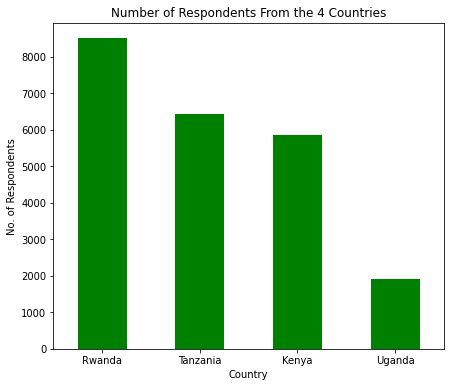

In [0]:
# Bar chart of the column country

finance_clean.country.value_counts().plot(kind='bar', figsize=(7, 6), rot = 0, color = 'green')

# Labelling our x axis
plt.xlabel("Country")

# Labelling our y axis
plt.ylabel("No. of Respondents")

# Giving a title to our Bar chart
plt.title("Number of Respondents From the 4 Countries")

# Displaying our chart
plt.show()

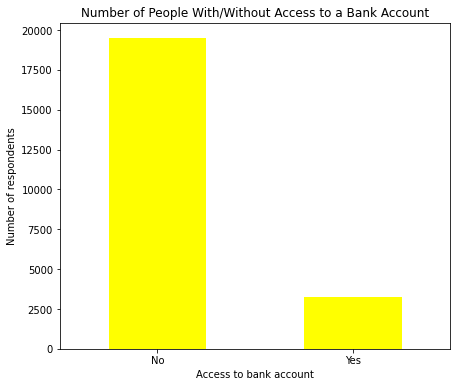

In [0]:
# Bar chart of the column Has a bank account

finance_clean["Has a Bank account"].value_counts().plot(kind='bar', figsize=(7, 6), rot = 0, color = 'yellow')


# Labelling our x axis
plt.xlabel("Access to bank account")

# Labelling our y axis
plt.ylabel("Number of respondents")

# Giving a title to our Bar chart
plt.title("Number of People With/Without Access to a Bank Account")

# Displaying our chart
plt.show()


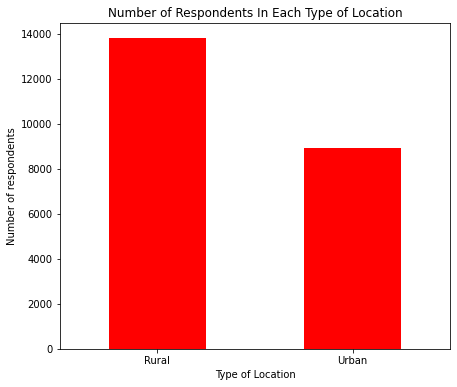

In [0]:
# Bar chart of the column Has a bank account

finance_clean["Type of Location"].value_counts().plot(kind='bar', figsize=(7, 6), rot = 0, color = 'red')

# Labelling our x axis
plt.xlabel("Type of Location")

# Labelling our y axis
plt.ylabel("Number of respondents")

# Giving a title to our Bar chart
plt.title("Number of Respondents In Each Type of Location")

# Displaying our chart
plt.show()

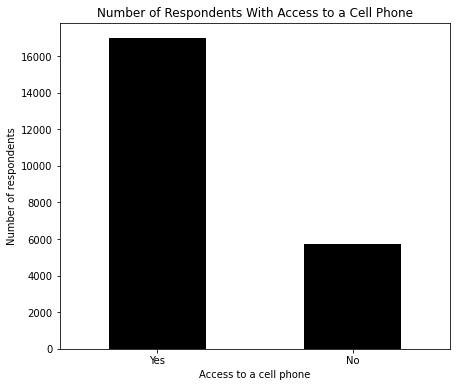

In [0]:
# Bar chart of the column Cell phone access

finance_clean["Cell Phone Access"].value_counts().plot(kind='bar', figsize=(7, 6), rot = 0, color = 'black')

# Labelling our x axis
plt.xlabel("Access to a cell phone")

# Labelling our y axis
plt.ylabel("Number of respondents")

# Giving a title to our Bar chart
plt.title("Number of Respondents With Access to a Cell Phone")

# Displaying our chart
plt.show()

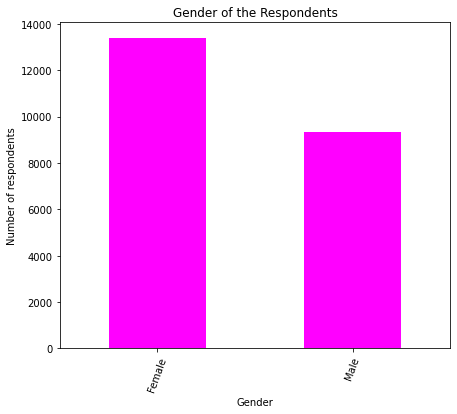

In [0]:
# Bar chart of the column gender_of_respondent

finance_clean["gender_of_respondent"].value_counts().plot(kind='bar', figsize=(7, 6), rot=70, color = 'magenta')

# Labelling our x axis
plt.xlabel("Gender")

# Labelling our y axis
plt.ylabel("Number of respondents")

# Giving a title to our Bar chart
plt.title("Gender of the Respondents")

# Displaying our chart
plt.show()

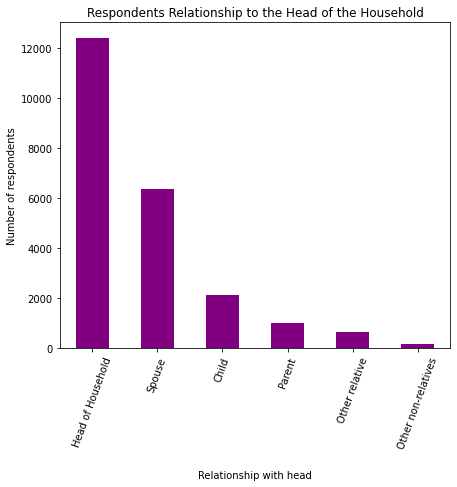

In [0]:
# Bar chart of the column Relathip with head

finance_clean["The relathip with head"].value_counts().plot(kind='bar', figsize=(7, 6), rot=70, color = 'purple')

# Labelling our x axis
plt.xlabel("Relationship with head", labelpad = 20)

# Labelling our y axis
plt.ylabel("Number of respondents")

# Giving a title to our Bar chart
plt.title("Respondents Relationship to the Head of the Household")

# Displaying our chart
plt.show()

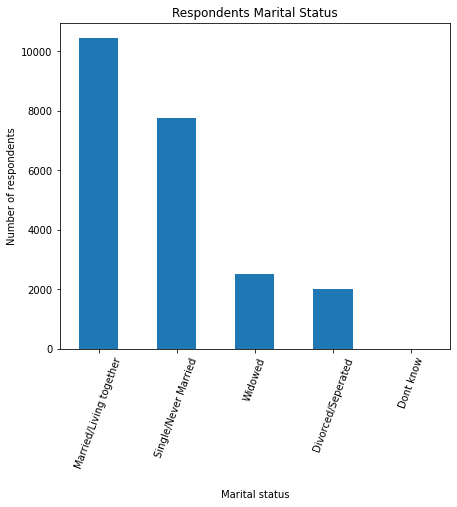

In [0]:
# Bar chart of the column marital_status

finance_clean["marital_status"].value_counts().plot(kind='bar', figsize=(7, 6), rot=70)

# Labelling our x axis
plt.xlabel("Marital status", labelpad = 20)

# Labelling our y axis
plt.ylabel("Number of respondents")

# Giving a title to our Bar chart
plt.title("Respondents Marital Status")

# Displaying our chart
plt.show()


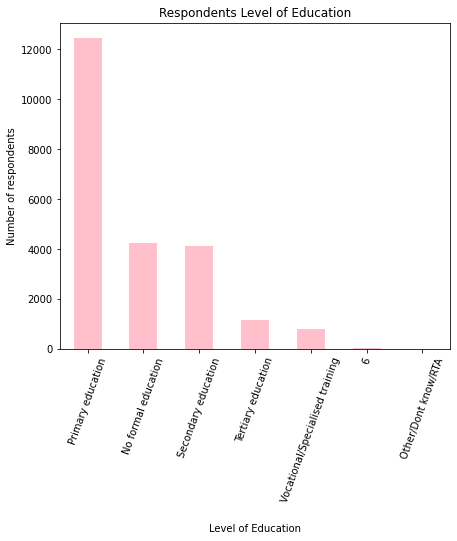

In [0]:
# Bar chart of the column Level of Education

finance_clean["Level of Educuation"].value_counts().plot(kind='bar', figsize=(7, 6), rot=70, color = 'pink')

# Labelling our x axis
plt.xlabel("Level of Education", labelpad = 20)

# Labelling our y axis
plt.ylabel("Number of respondents")

# Giving a title to our Bar chart
plt.title("Respondents Level of Education")

# Displaying our chart
plt.show()


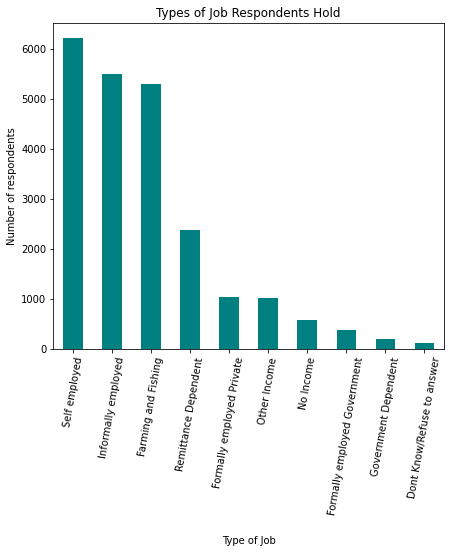

In [0]:
# Bar chart of the column Type of Job

finance_clean["Type of Job"].value_counts().plot(kind='bar', figsize=(7, 6), rot=80, color = 'teal')

# Labelling our x axis
plt.xlabel("Type of Job", labelpad = 20)

# Labelling our y axis
plt.ylabel("Number of respondents")

# Giving a title to our Bar chart
plt.title("Types of Job Respondents Hold")

# Displaying our chart
plt.show()

##### Histograms

Text(0, 0.5, 'No. of respondents')

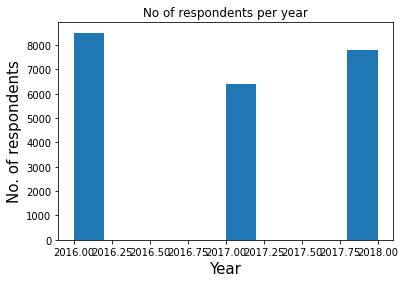

In [0]:
# Histogram of the column year


finance_clean['year'].hist(grid=False)
plt.title("No of respondents per year")
plt.xlabel("Year", fontsize=15)
plt.ylabel("No. of respondents",fontsize=15)

Text(0, 0.5, 'No. of respondents')

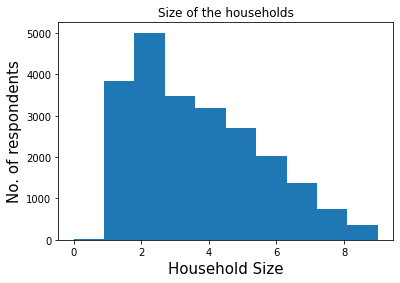

In [0]:
# Histogram of the column household_size

finance_clean['household_size'].hist(grid=False)
plt.title("Size of the households")
plt.xlabel("Household Size", fontsize=15)
plt.ylabel("No. of respondents",fontsize=15)

Text(0, 0.5, 'Number of people')

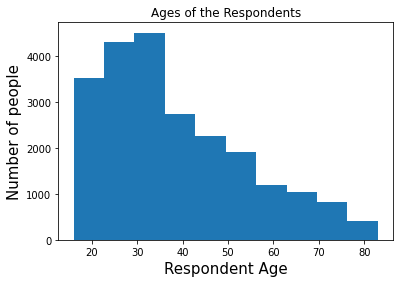

In [0]:
# Histogram of the column Respondent Age

finance_clean['Respondent Age'].hist(grid=False)
plt.title("Ages of the Respondents")
plt.xlabel("Respondent Age", fontsize=15)
plt.ylabel("Number of people",fontsize=15)

##### Boxplots

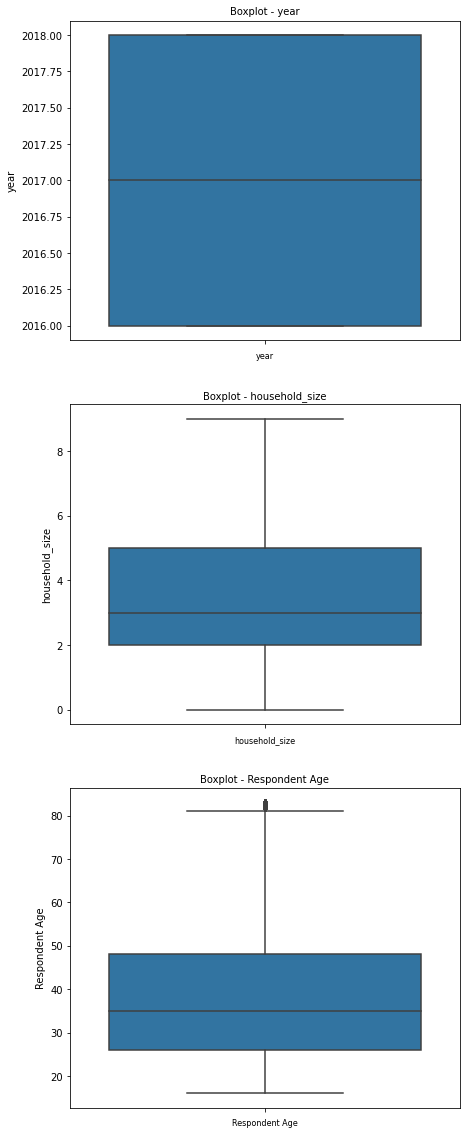

In [0]:
# Boxplots of the columns year, household size and respondent age

column_names = ['year', 'household_size', 'Respondent Age']
fig, ax = plt.subplots(len(column_names), figsize=(7,20))

for i, col_val in enumerate(column_names):
  sns.boxplot(y = finance_clean[col_val], ax=ax[i])
  ax[i].set_title('Boxplot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

### b) Bivariate Analysis

Bivariate analysis investigates the relationship among two variables and the strength of that relationship.

Our dataset has both numerical and categorical variables.

To compare 2 numerical variables, we'll use scatter plots then find their correlation.

To compare 2 categorical variables, we can use a stacked column chart.

To compare a categorical variable and a numerical variable, we can use line charts.



#### Scatter Plots

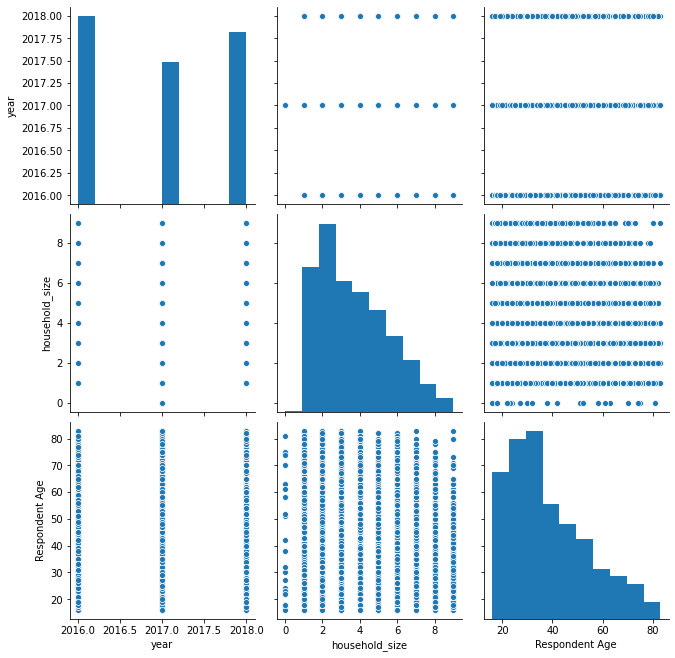

In [0]:
# Plot scatter plots of the numerical variables
# Scatter plots show how much one variable is affected by another

new = finance_clean.drop(['Unnamed: 0'], axis=1)
sns.pairplot(new, height = 3)
plt.show()

# From the scatter plots, we can see that there is a very weak relationship between the variables and a trend cannot be established.

#### Correlation

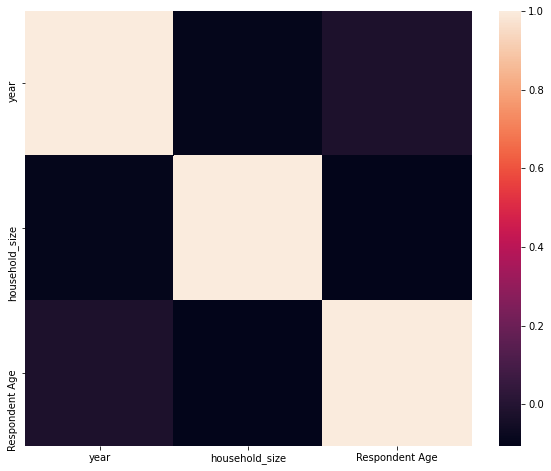

In [0]:
# Find the correlation of the numerical variables

f, ax = plt.subplots(figsize = (10,8))
corr = new.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
new.corr()

,year,household_size,Respondent Age
year,1.000000,-0.096684,-0.023538
household_size,-0.096684,1.000000,-0.106209
Respondent Age,-0.023538,-0.106209,1.000000


In [0]:
# From the above, we can see the following:

# Correlation between year and household size is -0.096. This shows that the two variables have a very
# weak negative correlation

# Correlation between year and Respondent Age is -0.0235. This shows that the two variables have a very
# weak negative correlation

# Correlation between household size and Respondent Age is -0.106. This shows that the two variables have a very
# weak negative correlation


### c) Multivariate Analysis

Multivariate analysis is performed on more complex datasets.

For this research question, I'll use Principal Component Analaysis (PCA) to convert data from a high dimension to a lower dimension by selecting the most important features.

Since most of the columns are categorical variables, I'll do one hot encoding of the categorical variables so that I can apply PCA on them and get (Prinicpal Component) PC1 and PC2 that I will use to plot and visualize the dataset.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalfinance = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalfinance

,principal component 1,principal component 2
0,0.175479,-1.385604
1,0.626591,3.682105
2,0.001987,-2.388036
3,1.826662,-0.006147
4,0.675085,0.077413
...,...,...
22720,-1.354821,1.430178
22721,-0.292073,0.327467
22722,-1.049828,-0.692357
22723,-0.860935,-0.140152


In [0]:
finalfinance = pd.concat([principalfinance, finance[['Has a Bank account']]], axis = 1)
finalfinance

,principal component 1,principal component 2,Has a Bank account
0,0.175479,-1.385604,Yes
1,0.626591,3.682105,No
2,0.001987,-2.388036,Yes
3,1.826662,-0.006147,No
4,0.675085,0.077413,No
...,...,...,...
23519,NaN,NaN,No
23520,NaN,NaN,No
23521,NaN,NaN,No
23522,NaN,NaN,No


In [0]:
finalfinance.columns = ['principal component 1','principal component 2','account']

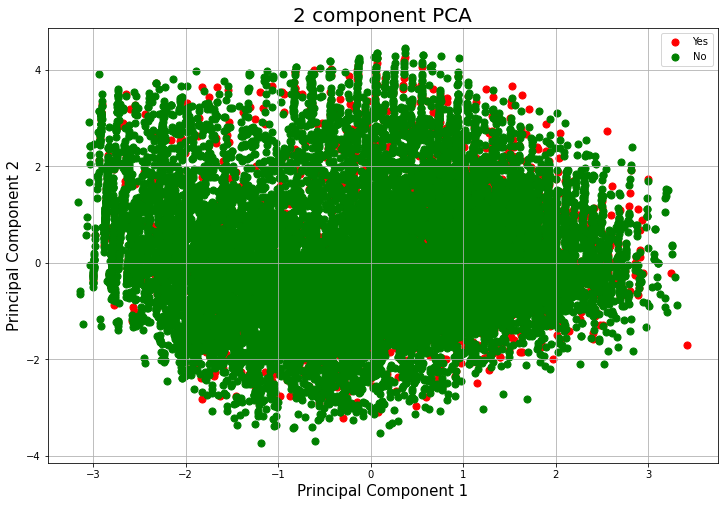

In [0]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
accounts = ['Yes', 'No']
colors = ['r', 'g']
for account, color in zip(accounts,colors):
    indicesToKeep = finalfinance['account'] == account
    ax.scatter(finalfinance.loc[indicesToKeep, 'principal component 1']
               , finalfinance.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(accounts)
ax.grid()

In [0]:
pca.explained_variance_ratio_

array([0.19268482, 0.16058479])

In [0]:
# Change the categorical variables to numerical using one hot encoding

from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
finance_clean['country']= Encoder.fit_transform(finance_clean['country'])
finance_clean['Type of Location']= Encoder.fit_transform(finance_clean['Type of Location'])
finance_clean['Cell Phone Access']= Encoder.fit_transform(finance_clean['Cell Phone Access'])
finance_clean['household_size']= Encoder.fit_transform(finance_clean['household_size'])
finance_clean['Respondent Age']= Encoder.fit_transform(finance_clean['Respondent Age'])
finance_clean['gender_of_respondent']= Encoder.fit_transform(finance_clean['gender_of_respondent'])
finance_clean['The relathip with head']= Encoder.fit_transform(finance_clean['The relathip with head'])
finance_clean['marital_status']= Encoder.fit_transform(finance_clean['marital_status'])
finance_clean['Level of Educuation']= Encoder.fit_transform(finance_clean['Level of Educuation'])
finance_clean['Type of Job']= Encoder.fit_transform(finance_clean['Type of Job'])

In [0]:
# Preprocessing - divide the dataset into a feature set and corresponding labels

features = ['country',	'Type of Location',	'Cell Phone Access', 'household_size',	'Respondent Age',	'gender_of_respondent',	'The relathip with head',	'marital_status',	'Level of Educuation',	'Type of Job']
x = finance_clean.loc[:, features].values

# Separating out the label
y = finance_clean.loc[:,['Has a Bank account']].values



In [0]:
# Split the dataset into the training set and test set 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)


In [0]:
# Normalization - perform standard scalar normalization to normalize 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [0]:
# Applying PCA

from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


In [0]:
# Explained variance ratio - this explains the variance caused by each of the PCs

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.19392701, 0.15985426, 0.15503421, 0.10156453, 0.08260454,
       0.08093911, 0.07173973, 0.0574807 , 0.05386191, 0.042994  ])

In [0]:
# Result with 1 PC

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


In [0]:
# Result with the full feature set

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


In [0]:
# From the above, we can see that the accuracy achieved with only one feature is the same as that achieved with the all the features. 
# Hence we can conclude that only one feature is the most important in predicting the likelihood of an individual having or using a bank account

## 6. Implementing the Solution

## 7. Challenging the Solution

## 8. Follow up questions